# **PREDICTING THE SUCCESS OF BANK MARKETING CAMPAIGN**

# Importing necessary packages and modules

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,auc,roc_curve,accuracy_score
import pickle

# Importing dataset

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/Project/bank-full.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,1,0,unknown,no


In [ ]:
df1=df.copy()

# Checking the shape of dataset

In [ ]:
df.shape

(45211, 17)

# Describing the dataset

In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1415.196081,15.806419,258.163080,2.763841,41.832563,0.580323
std,10.618762,3020.529906,8.322476,257.527812,3.098021,99.456849,2.303441
min,18.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,33.000000,137.000000,8.000000,103.000000,1.000000,1.000000,0.000000
50%,39.000000,485.000000,16.000000,180.000000,2.000000,1.000000,0.000000
75%,48.000000,1436.000000,21.000000,319.000000,3.000000,1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# Checking for missing values

In [ ]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# Checking the data type of each attribute

In [ ]:
df.dtypes


age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

# Checking the unique values of each attribute

In [ ]:
attributes=['job','marital','education','default','housing','loan','contact','day','month','poutcome']
for attribute in attributes:
  print(f'{">"*15} {attribute} {"<"*15}')
  print(df[attribute].value_counts())
  print()

>>>>>>>>>>>>>>> job <<<<<<<<<<<<<<<
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

>>>>>>>>>>>>>>> marital <<<<<<<<<<<<<<<
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

>>>>>>>>>>>>>>> education <<<<<<<<<<<<<<<
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

>>>>>>>>>>>>>>> default <<<<<<<<<<<<<<<
default
no     44396
yes      815
Name: count, dtype: int64

>>>>>>>>>>>>>>> housing <<<<<<<<<<<<<<<
housing
yes    25130
no     20081
Name: count, dtype: int64

>>>>>>>>>>>>>>> loan <<<<<<<<<<<<<<<
loan
no     37967
yes     7244
Name: count, dtype: int64

>>>>>>>>>>>>>>> contact <<<<<<<<<<<<<<<
contact
cellular     29285
unknown      13020
te

# Dealing with missing values
The value "unknown" in different columns are missing values

Dropping the column 'poutcome' as there are 36959 missing values in this column

In [ ]:
df.drop(['poutcome'],axis=1,inplace=True)

Converting missing value "unknown" to NaN with the help of numpy

In [ ]:
attributes1=['job','education','contact']
for attribute in attributes1:
  df[attribute]=df[attribute].replace('unknown',np.nan)

Filling the missing values in 'job' , 'education' and 'contact' with their mode value

In [ ]:
attributes2=['job','education','contact']
for attribute in attributes2:
  df[attribute]=df[attribute].fillna(df[attribute].mode()[0])

Checking for missing values

In [ ]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
y            0
dtype: int64

# Converting Object type value to Numeric type values

In [ ]:
attributes3=['job','marital','education','default','housing','loan','contact','month','y']
le=LabelEncoder()
for attribute in attributes3:
  df[attribute]=le.fit_transform(df[attribute])
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,4,1,2,0,2143,1,0,0,5,8,261,1,1,0,0
1,44,9,2,1,0,29,1,0,0,5,8,151,1,1,0,0
2,33,2,1,1,0,2,1,1,0,5,8,76,1,1,0,0
3,47,1,1,1,0,1506,1,0,0,5,8,92,1,1,0,0
4,33,1,2,1,0,1,0,0,0,5,8,198,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,1,0,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,1,0,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,1,0,0


# Checking the correlation between different features and class label

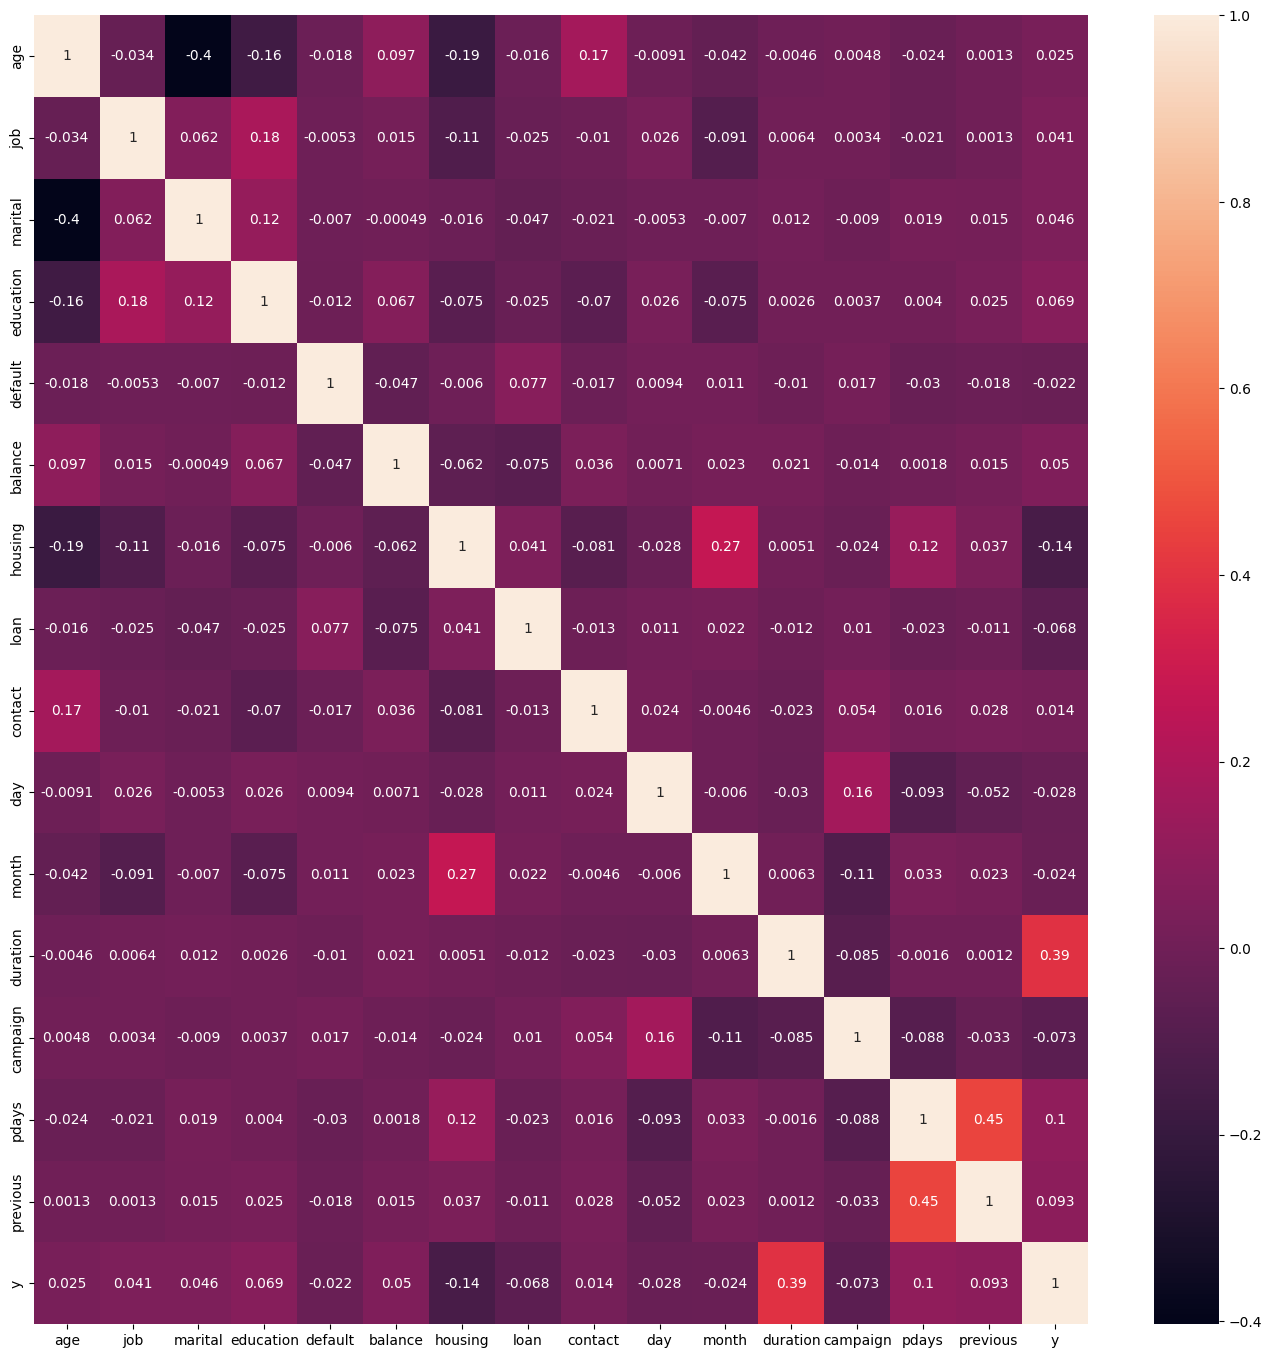

In [ ]:
plt.figure(figsize=(17,17))
sns.heatmap(df.corr(),annot=True,)
plt.show()

# Plotting joint plot of Age vs Account Balance with class label as hue

This plot shows that people from different age group even if they have high balance in their account they chose not to opt in for term deposit

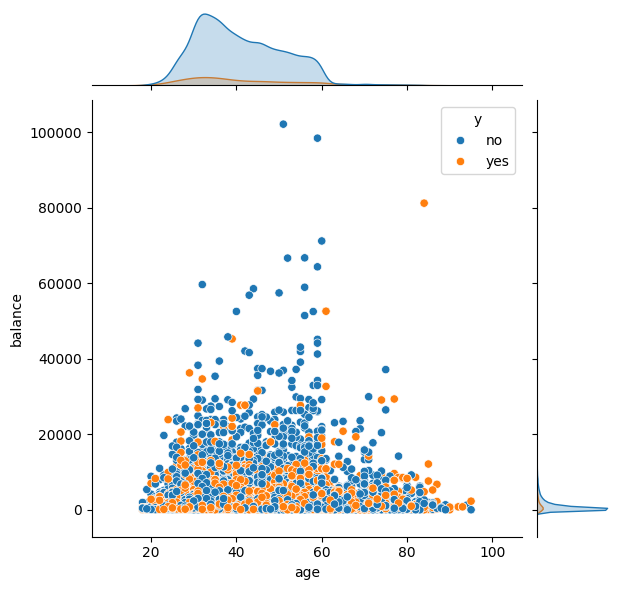

In [ ]:
sns.jointplot(x='age',y='balance',data=df1,hue='y')
plt.show()

# Plotting count plot of Job with Class label as hue
This plot helps us to identify people belonging to which job group opted more for term deposit.
We can see that people belonging to Management job opted more for term deposit

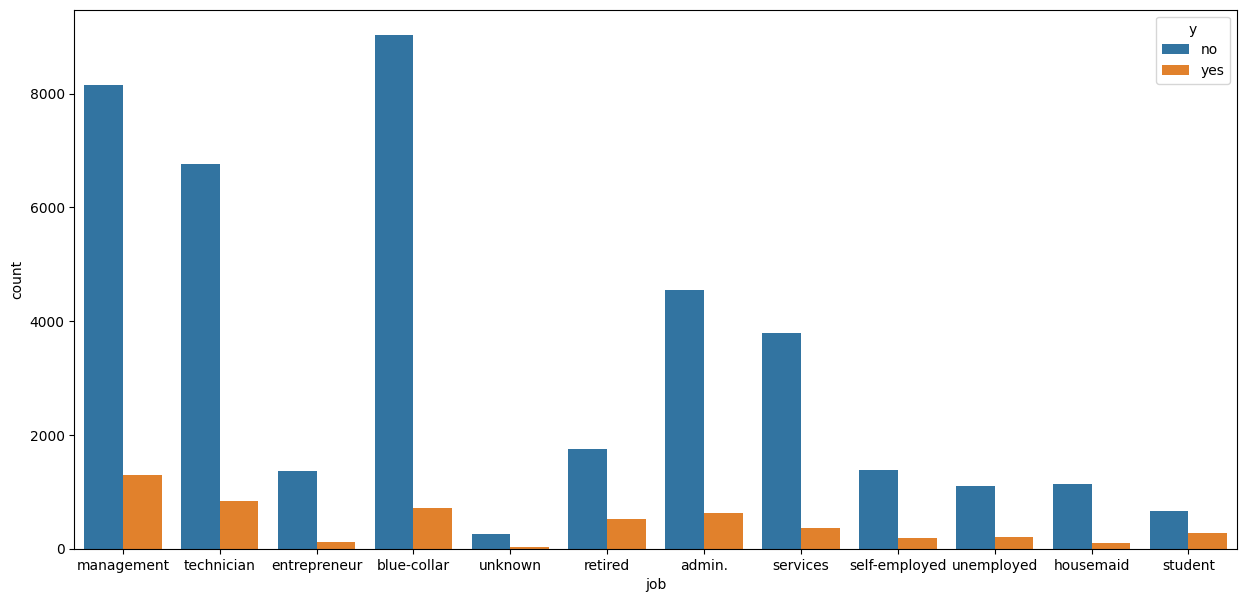

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(x='job',data=df1,hue='y')
plt.show()

# Plotting count plot of Marital status with Class label as hue
This plot helps us to identify people belonging to which marital group opted more for term deposit
We can see that married people opted more for term deposit

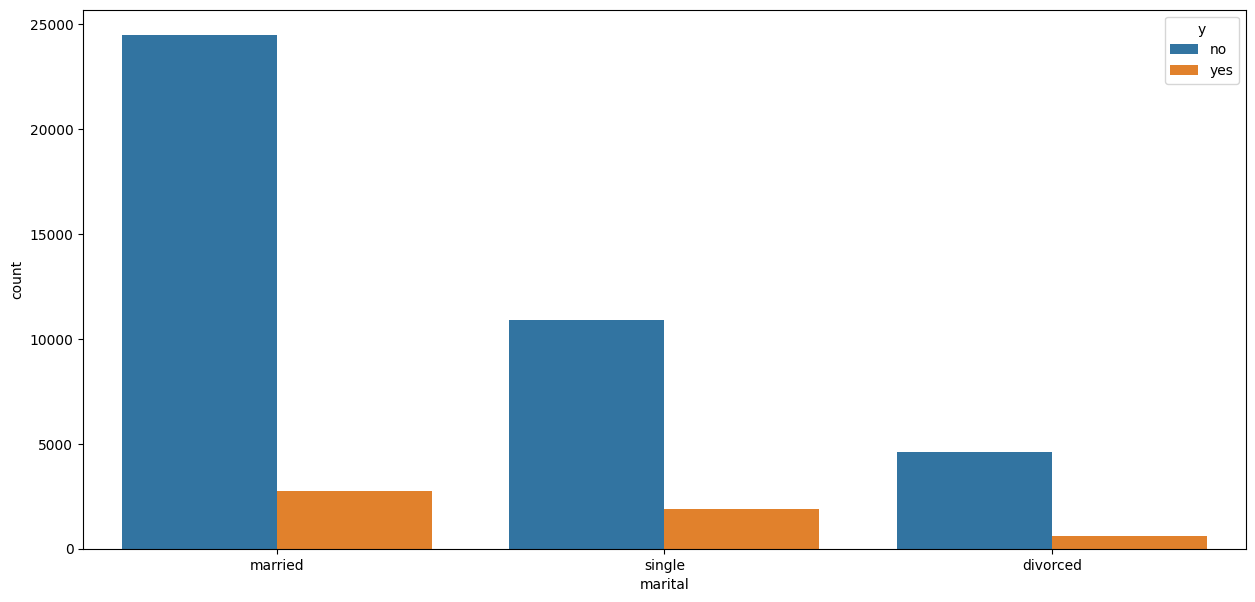

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(x='marital',data=df1,hue='y')
plt.show()

# Plotting joint plot of Campaign vs Duration with class label as hue

This plot shows that duration of call decreased with increasing number of campaign and people who received more campaign call opted less for term deposit

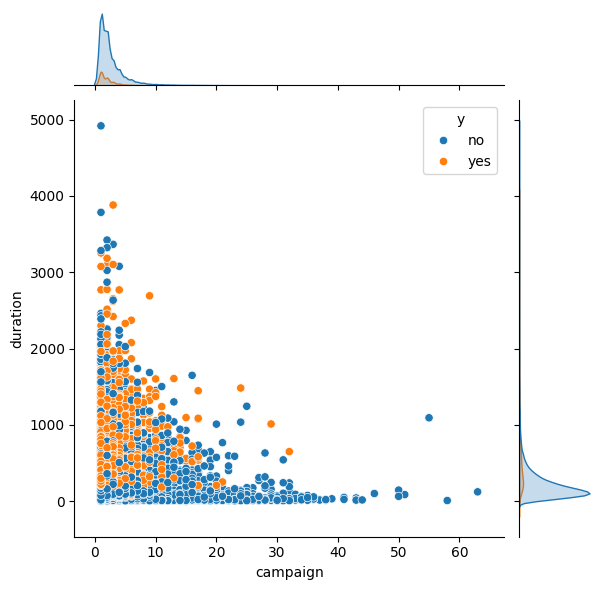

In [ ]:
sns.jointplot(x='campaign',y='duration',data=df1,hue='y')
plt.show()

# Seperating features from class label

In [ ]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1]

# Scaling the features

In [ ]:
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)

# Splittng the dataset into traing and testing dataset

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=1)

# Building different ML models and evaluating its performance

In [ ]:
knn=KNeighborsClassifier()
svc=SVC()
nb=GaussianNB()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier(random_state=1)
ab=AdaBoostClassifier(random_state=1)
gb=GradientBoostingClassifier(random_state=1)
xb=XGBClassifier(random_state=1)
models=[knn,svc,nb,dt,rf,ab,gb,xb]
for model in models:
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(model)
  print(classification_report(y_test,y_pred))
  print('*'*55)

KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     12013
           1       0.50      0.17      0.25      1551

    accuracy                           0.89     13564
   macro avg       0.70      0.57      0.59     13564
weighted avg       0.86      0.89      0.86     13564

*******************************************************
SVC()
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     12013
           1       0.58      0.02      0.04      1551

    accuracy                           0.89     13564
   macro avg       0.73      0.51      0.49     13564
weighted avg       0.85      0.89      0.84     13564

*******************************************************
GaussianNB()
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     12013
           1       0.39      0.42      0.40      1551

    accuracy                

# Checking for Imbalance in dataset

In [ ]:
df['y'].value_counts()

y
0    39922
1     5289
Name: count, dtype: int64

# Balancing the dataset by Oversampling

In [ ]:
os=SMOTE(random_state=1)
X_os,y_os=os.fit_resample(X,y)

# Checking the shape of oversampled dataset

In [ ]:
print(X_os.shape)
print(y_os.shape)

(79844, 15)
(79844,)


# Scaling oversampled dataset

In [ ]:
X_os_scaled=scaler.fit_transform(X_os)

# Splittng the oversampled dataset into traing and testing dataset

In [ ]:
X_os_train,X_os_test,y_os_train,y_os_test=train_test_split(X_os_scaled,y_os,test_size=0.3,random_state=1)

# Building different ML models on oversampled data and evaluating its performance

In [ ]:
acc=[]
knn=KNeighborsClassifier()
svc=SVC()
nb=GaussianNB()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier(random_state=1)
ab=AdaBoostClassifier(random_state=1)
gb=GradientBoostingClassifier(random_state=1)
xb=XGBClassifier(random_state=1)
models=[knn,svc,nb,dt,rf,ab,gb,xb]
for model in models:
  model.fit(X_os_train,y_os_train)
  y_pred=model.predict(X_os_test)
  acs=accuracy_score(y_os_test,y_pred)
  acc.append(acs*100)
  print(model)
  print(classification_report(y_os_test,y_pred))
  print('*'*55)

KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.85      0.88      0.87     12025
           1       0.88      0.85      0.86     11929

    accuracy                           0.87     23954
   macro avg       0.87      0.87      0.87     23954
weighted avg       0.87      0.87      0.87     23954

*******************************************************
SVC()
              precision    recall  f1-score   support

           0       0.87      0.85      0.86     12025
           1       0.85      0.87      0.86     11929

    accuracy                           0.86     23954
   macro avg       0.86      0.86      0.86     23954
weighted avg       0.86      0.86      0.86     23954

*******************************************************
GaussianNB()
              precision    recall  f1-score   support

           0       0.88      0.39      0.54     12025
           1       0.61      0.95      0.74     11929

    accuracy                

In [ ]:
m=['KNeighborsClassifier()','SVC()','GaussianNB()','DecisionTreeClassifier()','RandomForestClassifier()','AdaBoostClassifier()','GradientBoostingClassifier()','XGBClassifier()']
acd=pd.DataFrame({'Model':m,'Accuracy':acc})
acd.style.set_properties(**{'background-color': 'red'}, subset=pd.IndexSlice[4, :])

,Model,Accuracy
0,KNeighborsClassifier(),86.603490
1,SVC(),85.827002
2,GaussianNB(),66.702847
3,DecisionTreeClassifier(),88.185689
4,RandomForestClassifier(),92.063956
5,AdaBoostClassifier(),86.661935
6,GradientBoostingClassifier(),87.726476
7,XGBClassifier(),91.508725


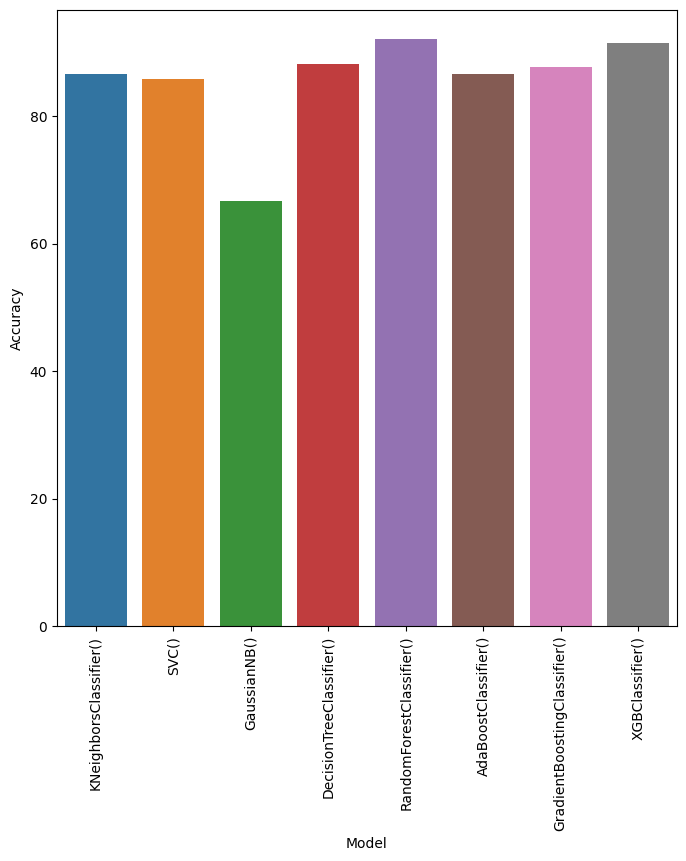

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(x='Model',y='Accuracy',data=acd,hue='Model',legend=False)
plt.xticks(rotation=90)
plt.show()

# Hyperparameter tuning using GridSearchCV
Random forest classifier has be selected as ML model for making new prediction as it has 92% accuray


In [ ]:
para={'criterion':['gini', 'entropy'],
      'max_depth':[5,10,15,20],
      'random_state':[1,4,9,18,42]}
clf=GridSearchCV(rf,para,cv=10,scoring='accuracy')
clf.fit(X_os_train,y_os_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20],
                         'random_state': [1, 4, 9, 18, 42]},
             scoring='accuracy')

Checking the best parameters

In [ ]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 20, 'random_state': 42}

Evaluating the performance of Hyperparameter tuned Random forest classifier and plotting **Confusion Matrix**

              precision    recall  f1-score   support

           0       0.94      0.88      0.91     12025
           1       0.89      0.95      0.92     11929

    accuracy                           0.92     23954
   macro avg       0.92      0.92      0.92     23954
weighted avg       0.92      0.92      0.92     23954



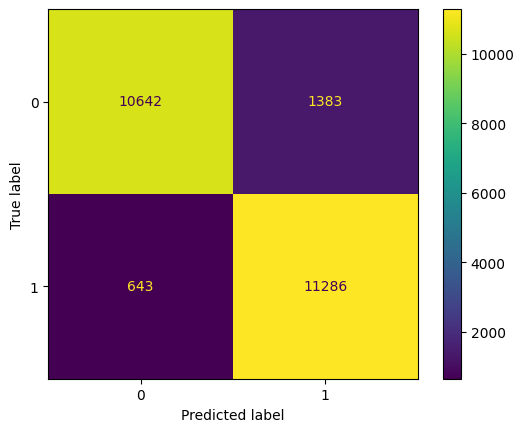

In [ ]:
y_os_pred=clf.predict(X_os_test)
print(classification_report(y_os_test,y_os_pred))
print(ConfusionMatrixDisplay.from_predictions(y_os_test,y_os_pred))

# **AUC-ROC curve**

The AUC-ROC curve, or Area Under the Receiver Operating Characteristic curve, is a graphical representation of the performance of a binary classification model at various classification thresholds

In [ ]:
y_pred_prob=clf.predict_proba(X_os_test)[:,-1]

In [ ]:
fpr,tpr,thresholds = roc_curve(y_os_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

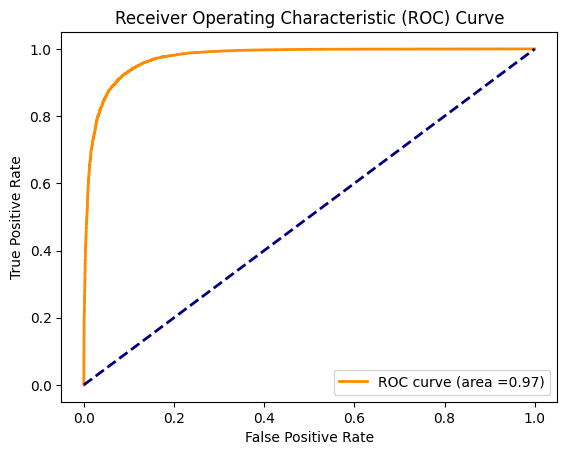

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area ={roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Predicting new values

In [ ]:
y_pred_new=clf.predict(scaler.transform([[72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3]]))
if y_pred_new.item()==0:
  print('No, Client did not subscribe to Term deposit')
else:
  print('Yes, Client subscribed to Term deposit')

Yes, Client subscribed to Term deposit


# Saving the model and scaler using pickle for creating Streamlit web app

In [ ]:
pickle.dump(clf,open('rf_model.sav','wb'))
pickle.dump(scaler,open('scaler.sav','wb'))